In [32]:
import matplotlib.pyplot as plt
import numpy



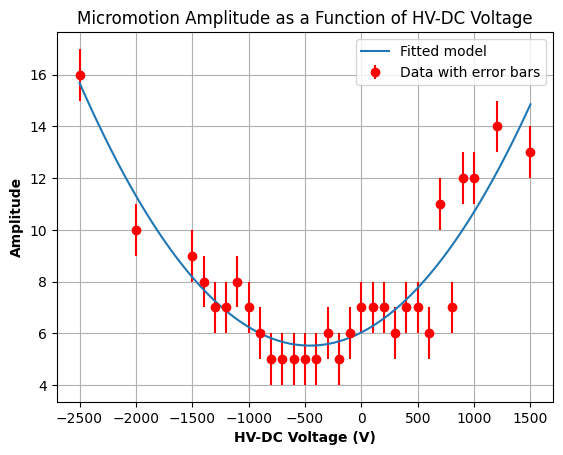

The minimum amplitude is 5.52 and occurs at -439.39 volts.


In [34]:
import numpy as np
import matplotlib.pyplot as plt

# Data
Voltage = np.array([-2500, -2000, -1500, -1400, -1300, -1200, -1100, -1000, -900, -800, -700, -600, -500, -400, -300, -200,
                    -100, 0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1200, 1500])
Amplitude = np.array([16, 10, 9, 8, 7, 7, 8, 7, 6, 5, 5, 5, 5, 5, 6, 5, 6, 7, 7, 7, 6, 7, 7, 6, 11, 7, 12, 12, 14, 13])

# Fit a polynomial of degree 2 to the data
model = np.poly1d(np.polyfit(Voltage, Amplitude, 2))

# Generate a range of voltage values for plotting and finding the minimum
voltage_range = np.linspace(min(Voltage), max(Voltage), 100)
amplitudes = model(voltage_range)

# Find the minimum amplitude and corresponding voltage
min_amplitude = np.min(amplitudes)
min_voltage = voltage_range[np.argmin(amplitudes)]

# Plotting
plt.errorbar(Voltage, Amplitude, yerr=1, fmt='o', color='red', label='Data with error bars')  # Data points with error bars
plt.plot(voltage_range, amplitudes, label='Fitted model')  # Fitted polynomial model
plt.title("Micromotion Amplitude as a Function of HV-DC Voltage")
plt.xlabel("HV-DC Voltage (V)", fontweight='bold')
plt.ylabel("Amplitude", fontweight='bold')
plt.legend()
plt.grid(True)
plt.show()

# Output the minimum amplitude and corresponding voltage
print(f"The minimum amplitude is {min_amplitude:.2f} and occurs at {min_voltage:.2f} volts.")


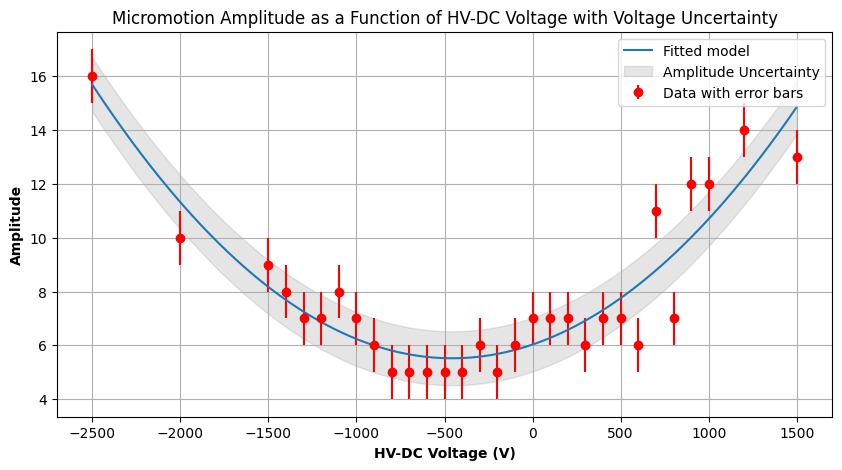

Estimated voltage uncertainty at -439.39 V is ±11330.90 V.


In [43]:
import numpy as np
import matplotlib.pyplot as plt

# Given data
Voltage = np.array([-2500, -2000, -1500, -1400, -1300, -1200, -1100, -1000, -900, -800, -700, -600, -500, -400, -300, -200,
                    -100, 0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1200, 1500])
Amplitude = np.array([16, 10, 9, 8, 7, 7, 8, 7, 6, 5, 5, 5, 5, 5, 6, 5, 6, 7, 7, 7, 6, 7, 7, 6, 11, 7, 12, 12, 14, 13])

# Polynomial fit
coefficients = np.polyfit(Voltage, Amplitude, 2)
model = np.poly1d(coefficients)

# Derivative of the polynomial model
derivative = np.polyder(model)

# Error in amplitude
amplitude_error = 1

# Calculate the uncertainty in voltage across the voltage range
voltage_range = np.linspace(min(Voltage), max(Voltage), 100)
voltage_error = amplitude_error / np.abs(derivative(voltage_range))

# Plotting
plt.figure(figsize=(10, 5))
plt.errorbar(Voltage, Amplitude, yerr=amplitude_error, fmt='o', color='red', label='Data with error bars')
plt.plot(voltage_range, model(voltage_range), label='Fitted model')
plt.fill_between(voltage_range, model(voltage_range) - amplitude_error, model(voltage_range) + amplitude_error, alpha=0.2, color='gray', label='Amplitude Uncertainty')
plt.title("Micromotion Amplitude as a Function of HV-DC Voltage with Voltage Uncertainty")
plt.xlabel("HV-DC Voltage (V)", fontweight='bold')
plt.ylabel("Amplitude", fontweight='bold')
plt.legend()
plt.grid(True)
plt.show()

# Display estimated voltage uncertainty at a specific voltage (e.g., minimum amplitude voltage)
specific_voltage = min_voltage
specific_voltage_error = amplitude_error / np.abs(derivative(specific_voltage))
print(f"Estimated voltage uncertainty at {specific_voltage:.2f} V is ±{specific_voltage_error:.2f} V.")
